# Corpus Statistics - Lab

## Introduction

In this lab, we'll learn how to use various NLP techniques to generate descriptive statistics to explore a text corpus!

## Objectives

You will be able to:

* Generate common corpus statistics using NLTK
* Tokenize and preprocess a text document to create a Bag of Words using NLTK
* Compare two different text corpora using corpus statistics generated by NLTK

## Getting Started

In this lab, we'll load two different text corpora from NLTK's library of various texts, and then explore and compare each corpus using some basic statistical measures and techniques common in NLP. Let's get started!

In the cell below:

* Import `nltk`
* Import `gutenberg` and `stopwords` from `nltk.corpus`
* Import everything (`*`) from `nltk.collocations`
* Import `FreqDist` and `word_tokenize` from `nltk`
* Import the `string` and `re` libraries

In [25]:
import nltk
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/aleigha/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleigha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string
import re

Now, let's take a look at the corpora available to us. There are many, many corpora available inside of nltk's `corpus` module. For this lab, we'll make use of the texts contained with `corpus.gutenberg`-- 18 different (complete) corpora that can be found on the [Project Gutenberg](https://www.gutenberg.org/) website. 

To see the file ids for each of the corpora inside of `gutenberg`, we can call the `.fileids()` method. Do this now in the cell below.

In [9]:
file_ids = gutenberg.fileids()
file_ids

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Great! For the first part of this lab, we'll be working with Shakespeare's _Macbeth_, a lighthearted romantic comedy about a pair of ambitious social climbers. 

To load the actual corpus, we need to pass in the file id for macbeth into `gutenberg.raw()`. 

Do this now in the cell below.  Then, print the first 1000 characters of the text to ensure it loaded correctly, and get a feel for what our text data looks like.

In [16]:
macbeth_text = gutenberg.raw('shakespeare-macbeth.txt')
print(macbeth_text[:1000])

[The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through the fogge and filthie ayre.

Exeunt.


Scena Secunda.

Alarum within. Enter King Malcome, Donalbaine, Lenox, with
attendants,
meeting a bleeding Captaine.

  King. What bloody man is that? he can report,
As seemeth by his plight, of the Reuolt
The newest state

   Mal. This is the Serieant,
Who like a good and hardie Souldier fought
'Gainst my Captiuitie: Haile braue friend;
Say to the King, the knowledge of the Broyle,
As thou didst leaue it

   Cap. Doubtfull it stood,
As two spent Swimmers, t

**_Question:_**  Look at the text snippet above. What do you notice about it? Are there are issues you see that we'll need to deal with during the preprocessing steps?

Write your answer below this line:
_______________________________________________________________________________
there  is a summary, plus stage directions,in addition to the lines of the play and who said them

### Preprocessing the Data

Looking at the text output above shows us a few things that we'll need to deal with during the preprocessing and tokenization steps--specifically:

* Capitalization--we'll need to lowercase all words. 
* Apostrophes--we'll need to write some basic regex in order to capture words that contain apostrophes as a single token. In the interest of time, a pattern has been provided for you. Use the following pattern:  `"([a-zA-Z]+(?:'[a-z]+)?)"`
* Numbers--We'll want to remove these, as they generally appear as stage direction to tell us which witch is speaking. 

In the cell below:

* Store the pattern shown above in the appropriate variable. 
* Use `nltk.regex_tokenize` and pass in our text, and the `pattern`

In [18]:

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
macbeth_tokens_raw = nltk.regexp_tokenize(macbeth_text, pattern)

Great! Now that we have our tokens, we need to lowercase them. In the cell below, use a list comprehension and the `.lower()` method on every word token in `macbeth_tokens`. Store this inside `macbeth_tokens`.

In [22]:
macbeth_tokens = [w.lower() for w in macbeth_tokens_raw]

## Frequency Distributions

Now that we've created done some basic cleaning and tokenization, let's go ahead and create a **_Frequency Distribution_** to see the number of times each word is used in this play. This frequency distribution is an example of a **_Bag of Words_**, which you've worked with in previous labs. 

In the cell below:

* Create a `FreqDist` and pass in `macbeth_tokens` as the input.
* Display the frequency distribution to see what it looks like (jupyter will automatically truncate it for you)

In [23]:
macbeth_freqdist = FreqDist(macbeth_tokens)
macbeth_freqdist.most_common(50)

[('the', 649),
 ('and', 545),
 ('to', 383),
 ('of', 338),
 ('i', 331),
 ('a', 241),
 ('that', 227),
 ('my', 203),
 ('you', 203),
 ('in', 199),
 ('is', 180),
 ('not', 165),
 ('it', 161),
 ('with', 153),
 ('his', 146),
 ('be', 137),
 ('macb', 137),
 ('your', 126),
 ('our', 123),
 ('haue', 122),
 ('but', 120),
 ('me', 113),
 ('he', 110),
 ('for', 109),
 ('what', 106),
 ('this', 104),
 ('all', 99),
 ('so', 96),
 ('him', 90),
 ('as', 89),
 ('thou', 87),
 ('we', 83),
 ('enter', 81),
 ('which', 80),
 ('are', 73),
 ('will', 72),
 ('they', 70),
 ('shall', 68),
 ('no', 67),
 ('then', 63),
 ('macbeth', 62),
 ('their', 62),
 ('thee', 61),
 ('vpon', 58),
 ('on', 58),
 ('macd', 58),
 ('from', 57),
 ('yet', 57),
 ('thy', 56),
 ('vs', 55)]

Well, that doesn't tell us very much! The top 10 most used words in macbeth are all **_Stop Words_**. They don't contain any interesting information, and essentially just act as the "connective tissue" between the words that really matter in any text. Let's try removing the stopwords and punctuation, and then creating another another frequency distribution that contains only the important words. 

## Removing Stop Words and Punctuation

We've already imported the `stopwords` module. We can access all of the stopwords using the `stopwords.words()` method--however, we don't want to use the whole thing, as this contains all stopwords in every language supported by NLTK. We don't need to check for check for and remove any Finnish or Japanese stop words, as this text is in English. To avoid unnecessarily long runtimes, we'll just use the English subset of stopwords by passing in the parameter `"english"` into `stopwords.words()`.

In the cell below:

* Get all the `'english'` stopwords from `stopwords.words()` and store them in the appropriate variable below. They will be stored as a list, by default. 
* We'll also want to remove all punctuation. Create a list version of `string.punctuation` and add it to our stopwords list. 
* Finally, we'll also remove numbers. Create a list that contains numbers 0-9 (as strings!), and add this to the stopwords list as well. 
* Use another list comprehension to get words out of `macbeth_tokens` as long as they are not in `stopwords_list`.

In [27]:
stopwords_list = stopwords.words("english")
stopwords_list += string.punctuation
stopwords_list += ['1','2','3','4','5','6','7','8','9']

macbeth_words_stopped = [w for w in macbeth_tokens if w not in stopwords_list]

Great! Now, let's create another frequency distribution using `macbeth_words_stopped`, and then inspect the top 50 most common words, to see if removing stopwords and punctuation has helped. 

Do this now in the cell below.

In [28]:
macbeth_stopped_freqdist = FreqDist(macbeth_words_stopped)
macbeth_stopped_freqdist.most_common(50)

[('macb', 137),
 ('haue', 122),
 ('thou', 87),
 ('enter', 81),
 ('shall', 68),
 ('macbeth', 62),
 ('thee', 61),
 ('vpon', 58),
 ('macd', 58),
 ('yet', 57),
 ('thy', 56),
 ('vs', 55),
 ('come', 54),
 ('king', 54),
 ('hath', 52),
 ('good', 49),
 ('rosse', 49),
 ('lady', 48),
 ('would', 47),
 ('time', 46),
 ('like', 43),
 ('say', 39),
 ('doe', 38),
 ('lord', 38),
 ('make', 38),
 ('tis', 37),
 ('must', 36),
 ('done', 35),
 ('selfe', 35),
 ('ile', 35),
 ('feare', 35),
 ('let', 35),
 ('man', 34),
 ('wife', 34),
 ('night', 34),
 ('banquo', 34),
 ('well', 33),
 ('know', 33),
 ('one', 32),
 ('great', 31),
 ('see', 31),
 ('may', 31),
 ('exeunt', 30),
 ('speake', 29),
 ('sir', 29),
 ('lenox', 28),
 ('mine', 26),
 ('vp', 26),
 ('th', 26),
 ('mal', 25)]

This is definitely an improvement! You may be wondering why `'Macb'` shows up as the number 1 most used token. If you inspect [Macbeth](http://www.gutenberg.org/cache/epub/1795/pg1795-images.html) on project gutenberg and search for `'Macb'`, you'll soon discover that the source text denotes `Macb` as stage direction for any line spoken by Macbeth's character. This means that `'Macb'` is actually stage direction, meaning that under normal circumstances, we would need to ask ourselves if it is worth it to remove it or keep it. In the interest of time for this lab, we'll leave it be. 

## Answering Questions about our Corpus

Now that we have a Frequency Distribution, we can easily answer some basic questions about the text. Let's answer some basic questions about Macbeth below, before we move onto creating bigrams. 

### Vocabulary Size

what is size of the total vocabulary used in Macbeth, once all stopwords have been removed?

Compute this in the cell below. 

In [29]:
len(macbeth_stopped_freqdist)

3441

### Normalized Word Frequency

Knowing the frequency with which each word is used is somewhat informative, but without the context of how many words are in used in total, it doesn't tell us much. One way we can adjust for this is to use **_Normalized Word Frequency_**, which we can compute by dividing each word frequency by the total number of words. 

Compute this now in the cell below, and display the normalized word frequency for the top 50 words. 

In [30]:
total_word_count = len(macbeth_stopped_freqdist)
macbeth_top_50 = macbeth_stopped_freqdist.most_common(50)
print("Word\t\t\tNormalized Frequency")
for word in macbeth_top_50:
    normalized_frequency = (word[1]/total_word_count)
    print("{} \t\t\t {:.4}".format(word[0], normalized_frequency))

Word			Normalized Frequency
macb 			 0.03981
haue 			 0.03545
thou 			 0.02528
enter 			 0.02354
shall 			 0.01976
macbeth 			 0.01802
thee 			 0.01773
vpon 			 0.01686
macd 			 0.01686
yet 			 0.01656
thy 			 0.01627
vs 			 0.01598
come 			 0.01569
king 			 0.01569
hath 			 0.01511
good 			 0.01424
rosse 			 0.01424
lady 			 0.01395
would 			 0.01366
time 			 0.01337
like 			 0.0125
say 			 0.01133
doe 			 0.01104
lord 			 0.01104
make 			 0.01104
tis 			 0.01075
must 			 0.01046
done 			 0.01017
selfe 			 0.01017
ile 			 0.01017
feare 			 0.01017
let 			 0.01017
man 			 0.009881
wife 			 0.009881
night 			 0.009881
banquo 			 0.009881
well 			 0.00959
know 			 0.00959
one 			 0.0093
great 			 0.009009
see 			 0.009009
may 			 0.009009
exeunt 			 0.008718
speake 			 0.008428
sir 			 0.008428
lenox 			 0.008137
mine 			 0.007556
vp 			 0.007556
th 			 0.007556
mal 			 0.007265


## Creating Bigrams

Knowing individual word frequencies is somewhat informative, but in practice, some of these tokens are actually parts of larger phrases that should be treated as a single unit. Let's create some bigrams, and see which combinations of words are most telling. 

In the cell below:

* We'll begin by aliasing a particularly long method name to make it easier to call. Store `nltk.collocations.BigramAssociationMeasures()` inside of the variable `bigram_measures`.
* Next, we'll need to create a **_finder_**. Pass `macbeth_words_stopped` into `BigramCollocationFinder.from_words()` and store the result returned inside of `macbeth_finder`.
* Once we have a finder, we can use it to compute bigram scores, so we can see the combinations that occur most frequently. Call the `macbeth_finder` object's `score_ngrams()` method and pass in `bigram_measures.raw_freq` as the input. 
* Display first 50 elements in the `macbeth_scored` list to see the 50 most common bigrams in macbeth. 

In [32]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [33]:
macbeth_finder = nltk.collocations.BigramCollocationFinder.from_words(macbeth_words_stopped)

In [34]:
macbeth_scored = macbeth_finder.score_ngrams(bigram_measures.raw_freq)

In [39]:
macbeth_scored[:50]

[(('enter', 'macbeth'), 0.0015818091942659417),
 (('exeunt', 'scena'), 0.0014829461196243204),
 (('thane', 'cawdor'), 0.0012852199703410777),
 (('knock', 'knock'), 0.0009886307464162135),
 (('lord', 'macb'), 0.0008897676717745922),
 (('thou', 'art'), 0.0008897676717745922),
 (('good', 'lord'), 0.0007909045971329708),
 (('haue', 'done'), 0.0007909045971329708),
 (('macb', 'haue'), 0.0007909045971329708),
 (('enter', 'lady'), 0.0006920415224913495),
 (('let', 'vs'), 0.0006920415224913495),
 (('macbeth', 'macb'), 0.0005931784478497281),
 (('enter', 'malcolme'), 0.0004943153732081067),
 (('enter', 'three'), 0.0004943153732081067),
 (('euery', 'one'), 0.0004943153732081067),
 (('macb', 'ile'), 0.0004943153732081067),
 (('macb', 'thou'), 0.0004943153732081067),
 (('make', 'vs'), 0.0004943153732081067),
 (('mine', 'eyes'), 0.0004943153732081067),
 (('mine', 'owne'), 0.0004943153732081067),
 (('scena', 'secunda'), 0.0004943153732081067),
 (('three', 'witches'), 0.0004943153732081067),
 (('thy'

These look a bit more interesting. We can see here that some of the most common ones are stage directions, such as 'Enter Macbeth' and 'Exeunt Scena', while others seem to be common phrases used in the play. 

To wrap up our initial examination of _Macbeth_, let's end by calculating **_Mutual Information Scores_**.

## Using Mutual Information Scores

To calculate Mutual Information Scores, we'll need to first create a frequency filter, so that we only examine bigrams that occur more than a set number of times--for our purposes, we'll set this limit to 5. 

In NLTK, mutual information is often referred to as `pmi`, for **_Pointwise Mutual Information_**. Calculating PMI scores works much the same way that we created bigrams, with a few notable differences.

In the cell below:

* We'll start by creating another finder for pmi. Create another `BigramCollocationFinder.from_words` and pass in `macbeth_words_stopped` as the input. Store this is the variable `macbeth_pmi_finder`.
* Once we have our finder, we'll need to apply our frequency filter. Call `macbeth_pmi_finder`'s `apply_freq_filter` and pass in the number `5` as the input. 
* Now, we can use the finder to calculate pmi scores. Use the pmi finder's `.score_ngrams()` function, and pass in `bigram_measures.pmi` as the argument. Store this in `macbeth_pmi_scored`.
* Examine the first 50 elements in `macbeth_pmi_scored`.

In [36]:
macbeth_pmi_finder = nltk.collocations.BigramCollocationFinder.from_words(macbeth_words_stopped)

In [37]:
macbeth_pmi_finder.apply_freq_filter(5)

In [38]:
macbeth_pmi_scored = macbeth_pmi_finder.score_ngrams(bigram_measures.pmi)

In [40]:
macbeth_pmi_scored[:50]

[(('three', 'witches'), 8.925697076191916),
 (('scena', 'secunda'), 8.844777080808349),
 (('knock', 'knock'), 8.62613679433301),
 (('thane', 'cawdor'), 7.968474805033251),
 (('exeunt', 'scena'), 7.844777080808349),
 (('mine', 'eyes'), 7.46626545755462),
 (('worthy', 'thane'), 6.982280604558284),
 (('mine', 'owne'), 6.838234234941577),
 (('euery', 'one'), 6.626136794333009),
 (('thou', 'art'), 5.861265203596917),
 (('enter', 'malcolme'), 5.585847073307292),
 (('enter', 'three'), 5.585847073307292),
 (('good', 'lord'), 5.441571341886851),
 (('let', 'vs'), 5.2009208910336255),
 (('enter', 'macbeth'), 5.0101623861741444),
 (('thy', 'selfe'), 4.689498855330438),
 (('make', 'vs'), 4.596849567364764),
 (('haue', 'done'), 4.2441883449377915),
 (('enter', 'lady'), 4.186751117897471),
 (('lord', 'macb'), 4.128174104483847),
 (('macb', 'ile'), 3.3988216944275145),
 (('would', 'haue'), 3.1408106050924847),
 (('macbeth', 'macb'), 2.836942806819401),
 (('macb', 'haue'), 2.2754392789222315),
 (('macb

## On Your Own: Comparative Corpus Statistics

Now that we've worked through generating some baseline corpus statistics for one corpus, it's up to you to select a second corpus and generate your own corpus statistics, and then compare and contrast the two. For simplicity's sake, we recommend you stick to a corpus from `nltk.corpus.gutenberg`--although comparing the diction found in a classic work of fiction to something like a presidential State of the Union address could be interesting, it's not really an apples-to-apples comparison, and those corpora could also require additional preprocessing steps that are outside the scope of this lab. 

In the cells below:

1. Select another corpus from `gutenberg.fileids()`.  
<br>  
2. Clean, preprocess, tokenize, and generate corpus statistics for this new corpus.   
<br>   
3. Perform a comparative analysis using the Macbeth statistics we generated above and your new corpus statistics. How are they similar? How are they different? Was there anything interesting or surprising that you found in your comparison? Create at least 1 meaningful visualization comparing the two corpora.

In [41]:
paradise_text = gutenberg.raw('milton-paradise.txt')
print(paradise_text[:1000])

[Paradise Lost by John Milton 1667] 
 
 
Book I 
 
 
Of Man's first disobedience, and the fruit 
Of that forbidden tree whose mortal taste 
Brought death into the World, and all our woe, 
With loss of Eden, till one greater Man 
Restore us, and regain the blissful seat, 
Sing, Heavenly Muse, that, on the secret top 
Of Oreb, or of Sinai, didst inspire 
That shepherd who first taught the chosen seed 
In the beginning how the heavens and earth 
Rose out of Chaos: or, if Sion hill 
Delight thee more, and Siloa's brook that flowed 
Fast by the oracle of God, I thence 
Invoke thy aid to my adventurous song, 
That with no middle flight intends to soar 
Above th' Aonian mount, while it pursues 
Things unattempted yet in prose or rhyme. 
And chiefly thou, O Spirit, that dost prefer 
Before all temples th' upright heart and pure, 
Instruct me, for thou know'st; thou from the first 
Wast present, and, with mighty wings outspread, 
Dove-like sat'st brooding on the vast Abyss, 
And mad'st it pregn

In [43]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
paradise_tokens_raw = nltk.regexp_tokenize(paradise_text, pattern)
paradise_tokens = [w.lower() for w in paradise_tokens_raw]
paradise_freqdist = FreqDist(paradise_tokens)
paradise_freqdist.most_common(50)


[('and', 3395),
 ('the', 2968),
 ('to', 2228),
 ('of', 2050),
 ('in', 1366),
 ('his', 1170),
 ('with', 1160),
 ('or', 715),
 ('that', 704),
 ('all', 700),
 ('from', 686),
 ('not', 626),
 ('their', 595),
 ('i', 590),
 ('but', 588),
 ('as', 564),
 ('he', 549),
 ('a', 545),
 ('on', 536),
 ('by', 519),
 ('for', 465),
 ('so', 445),
 ('thou', 432),
 ('this', 422),
 ('thy', 414),
 ('what', 391),
 ('they', 381),
 ('heaven', 366),
 ('thee', 358),
 ('him', 350),
 ('be', 339),
 ('now', 326),
 ('her', 325),
 ('thus', 318),
 ('which', 310),
 ('who', 294),
 ('me', 283),
 ('shall', 283),
 ('our', 275),
 ('at', 269),
 ('my', 259),
 ('more', 252),
 ('god', 245),
 ('then', 230),
 ('is', 229),
 ('yet', 228),
 ('them', 226),
 ('when', 223),
 ('though', 217),
 ('whom', 210)]

In [44]:
paradise_words_stopped = [w for w in paradise_tokens if w not in stopwords_list]
paradise_stopped_freqdist = FreqDist(paradise_words_stopped)
paradise_stopped_freqdist.most_common(50)

[('thou', 432),
 ('thy', 414),
 ('heaven', 366),
 ('thee', 358),
 ('thus', 318),
 ('shall', 283),
 ('god', 245),
 ('yet', 228),
 ('though', 217),
 ('earth', 207),
 ('us', 184),
 ('first', 175),
 ('man', 159),
 ('high', 153),
 ('one', 142),
 ('far', 129),
 ('may', 126),
 ('great', 123),
 ('death', 121),
 ('till', 120),
 ('like', 118),
 ('hell', 116),
 ('hath', 113),
 ('day', 112),
 ('stood', 110),
 ('whose', 109),
 ('might', 107),
 ('things', 105),
 ('good', 105),
 ('light', 104),
 ('night', 103),
 ('world', 99),
 ('love', 99),
 ('eve', 98),
 ('adam', 94),
 ('air', 93),
 ('soon', 91),
 ('fair', 91),
 ('still', 90),
 ('ye', 90),
 ('son', 89),
 ('life', 89),
 ('long', 87),
 ('let', 87),
 ('know', 86),
 ('place', 85),
 ('forth', 85),
 ('less', 81),
 ('way', 81),
 ('power', 80)]

In [45]:
len(paradise_stopped_freqdist)

8944

In [46]:
total_word_count = len(paradise_stopped_freqdist)
paradise_top_50 = paradise_stopped_freqdist.most_common(50)
print("Word\t\t\tNormalized Frequency")
for word in paradise_top_50:
    normalized_frequency2 = (word[1]/total_word_count)
    print("{} \t\t\t {:.4}".format(word[0], normalized_frequency2))

Word			Normalized Frequency
thou 			 0.0483
thy 			 0.04629
heaven 			 0.04092
thee 			 0.04003
thus 			 0.03555
shall 			 0.03164
god 			 0.02739
yet 			 0.02549
though 			 0.02426
earth 			 0.02314
us 			 0.02057
first 			 0.01957
man 			 0.01778
high 			 0.01711
one 			 0.01588
far 			 0.01442
may 			 0.01409
great 			 0.01375
death 			 0.01353
till 			 0.01342
like 			 0.01319
hell 			 0.01297
hath 			 0.01263
day 			 0.01252
stood 			 0.0123
whose 			 0.01219
might 			 0.01196
things 			 0.01174
good 			 0.01174
light 			 0.01163
night 			 0.01152
world 			 0.01107
love 			 0.01107
eve 			 0.01096
adam 			 0.01051
air 			 0.0104
soon 			 0.01017
fair 			 0.01017
still 			 0.01006
ye 			 0.01006
son 			 0.009951
life 			 0.009951
long 			 0.009727
let 			 0.009727
know 			 0.009615
place 			 0.009504
forth 			 0.009504
less 			 0.009056
way 			 0.009056
power 			 0.008945


In [48]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
paradise_finder = nltk.collocations.BigramCollocationFinder.from_words(paradise_words_stopped)
paradise_scored = paradise_finder.score_ngrams(bigram_measures.raw_freq)
paradise_scored[:50]

[(('thou', 'hast'), 0.0007245422210512449),
 (('heaven', 'earth'), 0.0006147630966495412),
 (('let', 'us'), 0.0005269397971281781),
 (('thou', 'art'), 0.0005269397971281781),
 (('hast', 'thou'), 0.0004171606727264743),
 (('good', 'evil'), 0.0003293373732051113),
 (('thus', 'eve'), 0.0003293373732051113),
 (('thou', 'seest'), 0.0003073815483247706),
 (('thus', 'adam'), 0.0003073815483247706),
 (('right', 'hand'), 0.0002854257234444298),
 (('thou', 'knowest'), 0.0002854257234444298),
 (('thou', 'shalt'), 0.0002854257234444298),
 (('thus', 'began'), 0.0002854257234444298),
 (('thus', 'replied'), 0.0002854257234444298),
 (('arch', 'angel'), 0.00026346989856408903),
 (('day', 'night'), 0.00026346989856408903),
 (('god', 'hath'), 0.00026346989856408903),
 (('thus', 'spake'), 0.00026346989856408903),
 (('god', 'man'), 0.0002415140736837483),
 (('thee', 'thy'), 0.0002415140736837483),
 (('thou', 'didst'), 0.0002415140736837483),
 (('thus', 'far'), 0.0002415140736837483),
 (('happy', 'state'), 

In [49]:
paradise_pmi_finder = nltk.collocations.BigramCollocationFinder.from_words(paradise_words_stopped)
paradise_pmi_finder.apply_freq_filter(5)
paradise_pmi_scored = paradise_pmi_finder.score_ngrams(bigram_measures.pmi)
paradise_pmi_scored[:50]

[(('ten', 'thousand'), 10.494489099567632),
 (('fish', 'fowl'), 10.396085395506638),
 (('drew', 'nigh'), 8.848597600204146),
 (('bird', 'beast'), 8.796964831788824),
 (('arch', 'angel'), 8.667681814843855),
 (('dry', 'land'), 8.532522231562222),
 (('living', 'creatures'), 8.081002841533678),
 (('human', 'sense'), 8.006267253684825),
 (('mine', 'eyes'), 7.6827887072340655),
 (('beast', 'field'), 7.667681814843856),
 (('needs', 'must'), 7.480683300042603),
 (('well', 'pleased'), 7.325289617396782),
 (('put', 'forth'), 7.300111054400782),
 (('happy', 'state'), 7.266558494689756),
 (('among', 'trees'), 7.167608211709213),
 (('right', 'hand'), 7.094658927434226),
 (('either', 'side'), 7.087881019238479),
 (('another', 'world'), 6.919680698265628),
 (('great', 'creator'), 6.766987485199245),
 (('thou', 'sawest'), 6.720149234737992),
 (('eternal', 'father'), 6.693677023376802),
 (('good', 'evil'), 6.645314001815402),
 (('without', 'end'), 6.645314001815402),
 (('thou', 'seest'), 6.52750415679

In [57]:
from nltk.util import ngrams
import matplotlib.pyplot as plt


%matplotlib inline

In [63]:
from matplotlib_venn import venn2


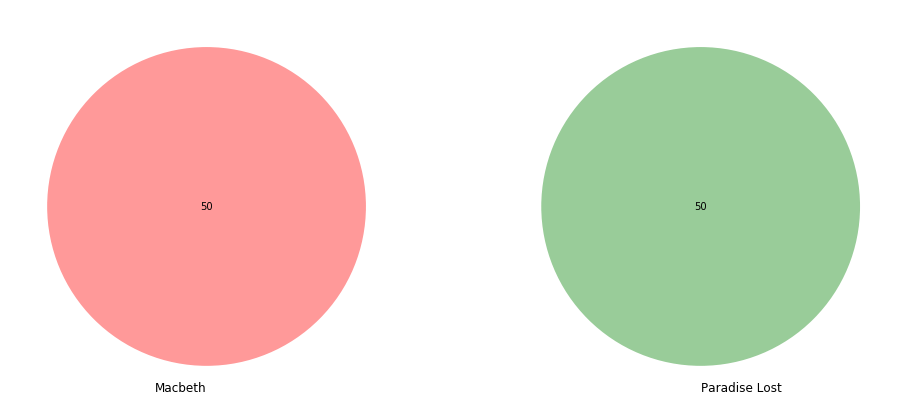

In [70]:
texts = ['Macbeth', "Paradise Lost"]
m = set(macbeth_stopped_freqdist.most_common(50))
p = set(paradise_stopped_freqdist.most_common(50))
plt.figure(figsize=(16,8))

venn2([m,p], set_labels = (texts))

plt.show()


## Summary

In this lab, we used our newfound NLP skills to generate some statistics specific to text data, and used them to compare 2 different works! 